In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from scipy.signal import find_peaks, argrelextrema,argrelmax,argrelmin
import scipy.stats as stats
from scipy.stats import genextreme as gev
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
import rpy2
from rpy2.robjects.packages import importr, data
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
from rpy2.robjects import globalenv
pandas2ri.activate()

extRemes = importr("extRemes")
evgam = importr("evgam")
%load_ext rpy2.ipython

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("cma.mplstyle")

In [3]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [4]:
yearb=1980
yeare=2008

files=[f'../AFI/AFI_ERA5_{iyear}_fullUSA_method3.nc' for iyear in range(yearb,yeare+1)]

ds=xr.open_mfdataset(files)
ds=ds.sortby('lat')

return_periods=[2, 5, 10, 25, 50, 100]
Tlon=ds.lon.data
Tlat=ds.lat.data

units='degree-days (°F)'

dsm=xr.open_dataset('../AFI/ERA5_air.2m.DJFclim.nc')
dsm=dsm.drop('season')
dsm=dsm.sortby('lat')
ds=ds.merge({'air':dsm['air']})

dsh=xr.open_dataset('../AFI/ERA5_hgt.sfc.nc')
dsh=dsh.sortby('lat')

/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/2095090559.py:16: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsm=dsm.drop('season')


In [5]:
ds['lat']

<xarray.DataArray 'lat' (lat: 193)> Size: 2kB
array([24.  , 24.25, 24.5 , 24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25,
       26.5 , 26.75, 27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75,
       29.  , 29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75, 32.  , 32.25, 32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75,
       34.  , 34.25, 34.5 , 34.75, 35.  , 35.25, 35.5 , 35.75, 36.  , 36.25,
       36.5 , 36.75, 37.  , 37.25, 37.5 , 37.75, 38.  , 38.25, 38.5 , 38.75,
       39.  , 39.25, 39.5 , 39.75, 40.  , 40.25, 40.5 , 40.75, 41.  , 41.25,
       41.5 , 41.75, 42.  , 42.25, 42.5 , 42.75, 43.  , 43.25, 43.5 , 43.75,
       44.  , 44.25, 44.5 , 44.75, 45.  , 45.25, 45.5 , 45.75, 46.  , 46.25,
       46.5 , 46.75, 47.  , 47.25, 47.5 , 47.75, 48.  , 48.25, 48.5 , 48.75,
       49.  , 49.25, 49.5 , 49.75, 50.  , 50.25, 50.5 , 50.75, 51.  , 51.25,
       51.5 , 51.75, 52.  , 52.25, 52.5 , 52.75, 53.  , 53.25, 53.5 , 53.75,
       54.  , 54.25, 54.5 , 54.75, 55.  , 55.25, 55.5 , 55.75, 56.  , 56.25,
       56.5 , 56.75, 57.  , 57.25, 57.5 , 57.75, 58.  , 58.25, 58.5 , 58.75,
       59.  , 59.25, 59.5 , 59.75, 60.  , 60.25, 60.5 , 60.75, 61.  , 61.25,
       61.5 , 61.75, 62.  , 62.25, 62.5 , 62.75, 63.  , 63.25, 63.5 , 63.75,
       64.  , 64.25, 64.5 , 64.75, 65.  , 65.25, 65.5 , 65.75, 66.  , 66.25,
       66.5 , 66.75, 67.  , 67.25, 67.5 , 67.75, 68.  , 68.25, 68.5 , 68.75,
       69.  , 69.25, 69.5 , 69.75, 70.  , 70.25, 70.5 , 70.75, 71.  , 71.25,
       71.5 , 71.75, 72.  ])
Coordinates:
  * lat      (lat) float64 2kB 24.0 24.25 24.5 24.75 ... 71.25 71.5 71.75 72.0
Attributes:
    long_name:           Latitude
    short_name:          lat
    units:               degrees_north
    actual_range:        [ 90. -90.]
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point

In [27]:
lon_min=245;lon_max=255
lat_min=38;lat_max=48

In [28]:
ds=ds.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
dsm=dsm.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
dsh=dsh.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/897141190.py:17: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax.get_xticks()],size=18)
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/897141190.py:19: SyntaxWarning: invalid escape sequence '\d'
  ax.set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax.get_yticks()],size=18)


Text(0.5, 0.98, 'AFI mean (1980-2009)')

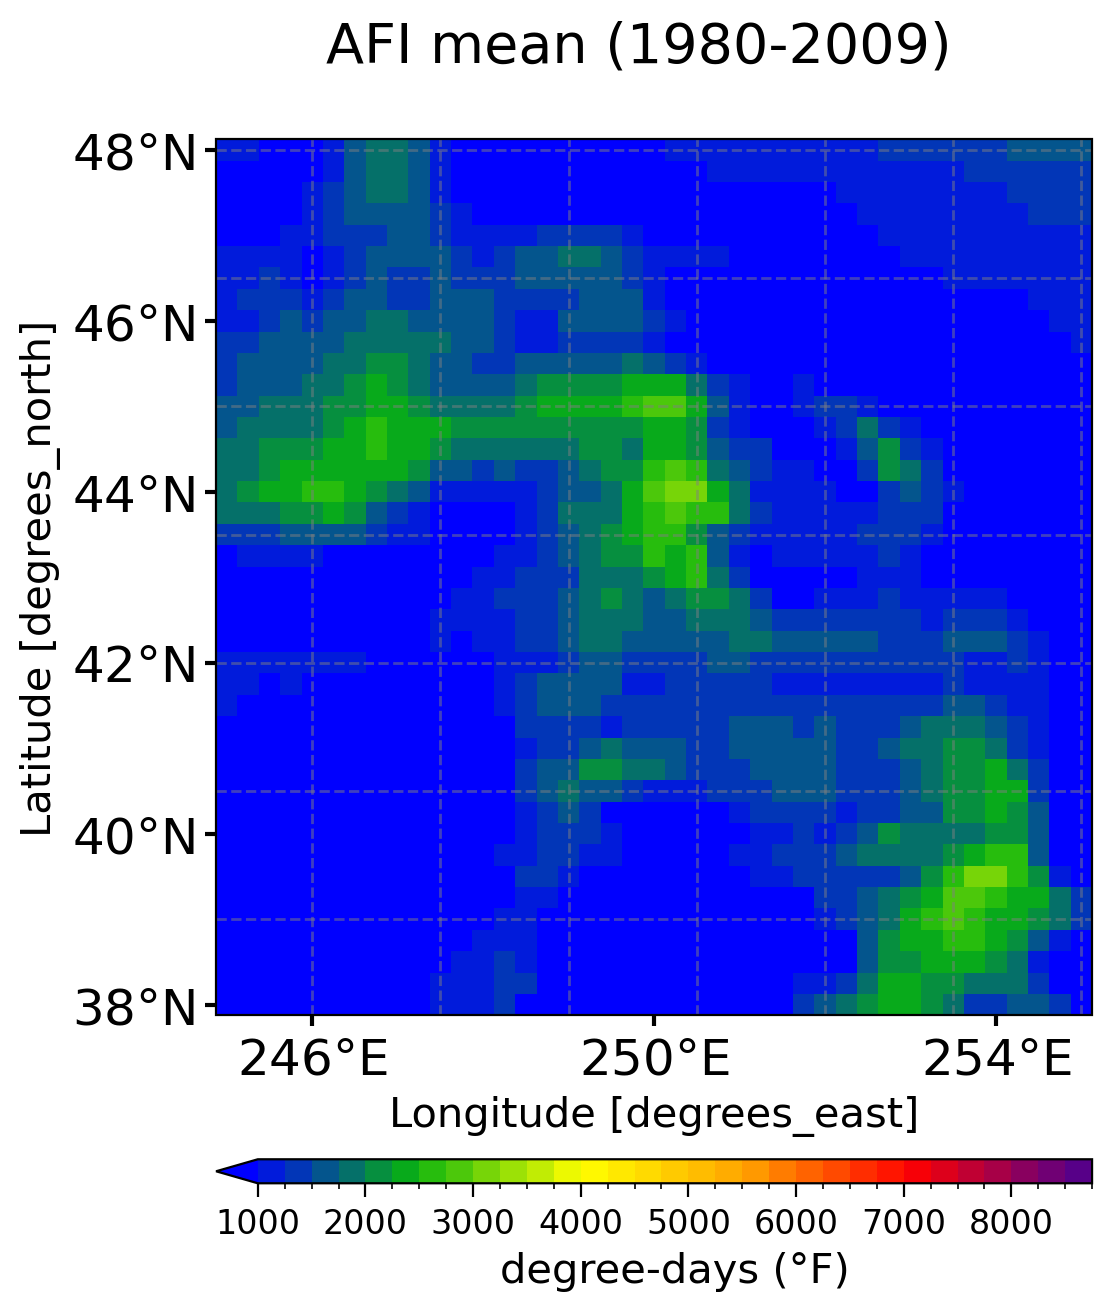

In [29]:
cmap=cmaps.BlGrYeOrReVi200
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.9)

cc=ds['AFI'].where(ds['AFI']>0.).mean('time').plot(ax=ax,cmap=cmap,levels=np.arange(1000,9000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.01, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,\
        shrink=0.5,\
        orientation='horizontal',label=units)
cbar.ax.tick_params(labelsize=12)
gr=ax.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--',draw_labels=False)
ax.tick_params(axis='both',direction='out',width=1.5,length=4)
ax.set_xticks(ax.get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
ax.set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax.get_xticks()],size=18)
ax.set_yticks(ax.get_yticks()[1:-1],crs=ccrs.PlateCarree())
ax.set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax.get_yticks()],size=18)
plt.suptitle('AFI mean (1980-2009)', fontsize=20)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/3021935927.py:10: SyntaxWarning: invalid escape sequence '\d'
  ax[1].set_title('DJF Temp ($\degree$C)',fontsize=14)
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/3021935927.py:13: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title('mean AFI ($\degree$-days(F))',fontsize=14)
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/3021935927.py:23: SyntaxWarning: invalid escape sequence '\d'
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)


[Text(0, 38.0, '38$\\degree$N'),
 Text(0, 40.0, '40$\\degree$N'),
 Text(0, 42.0, '42$\\degree$N'),
 Text(0, 44.0, '44$\\degree$N'),
 Text(0, 46.0, '46$\\degree$N'),
 Text(0, 48.0, '48$\\degree$N')]

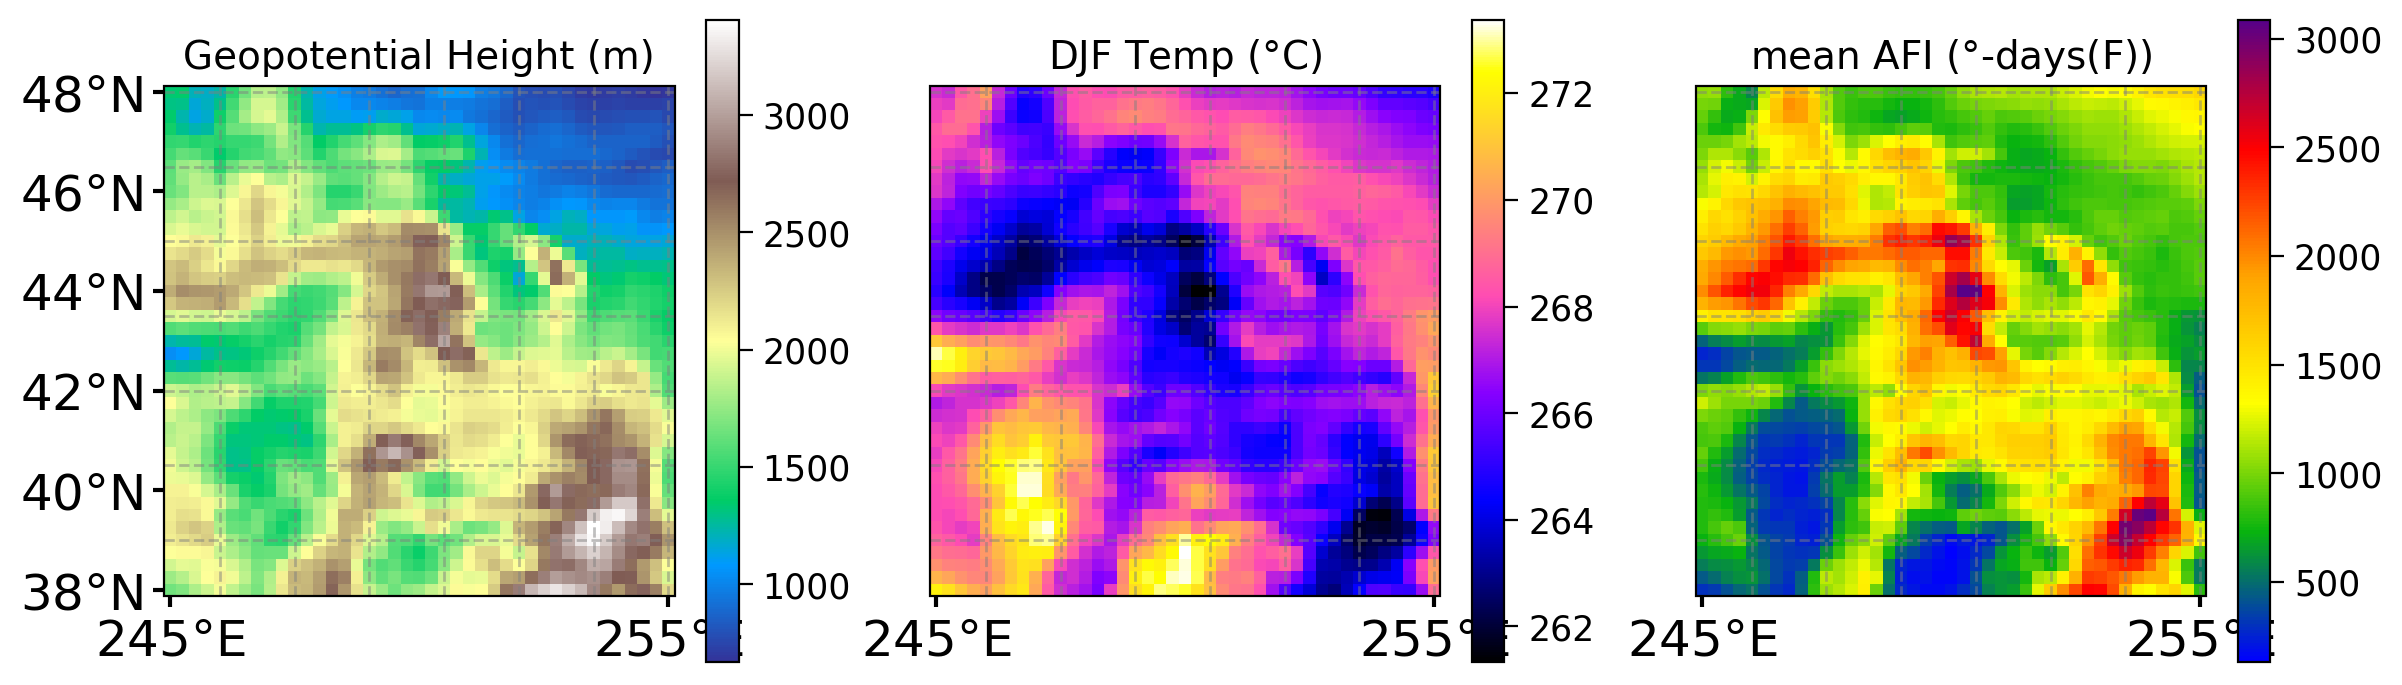

In [30]:
cmap=cmaps.BlGrYeOrReVi200
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.9)

dsh['hgt'].plot(ax=ax[0],cmap='terrain',cbar_kwargs={'label':'','shrink':0.55})
ax[0].set_title('Geopotential Height (m)',fontsize=14)

dsm['air'].plot(ax=ax[1],cmap='gnuplot2',cbar_kwargs={'label':'','shrink':0.55})
ax[1].set_title('DJF Temp ($\degree$C)',fontsize=14)

ds['AFI'].mean('time').plot(ax=ax[2],cmap=cmap,cbar_kwargs={'label':'','shrink':0.55})
ax[2].set_title('mean AFI ($\degree$-days(F))',fontsize=14)

for ix in range(0,len(ax)):
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].coastlines()
  #ax[ix].add_feature(state_borders,zorder=10,linewidth=0.25,edgecolor='k')
  gr=ax[ix].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--',draw_labels=False)
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)
ax[0].set_yticks(ax[0].get_yticks()[1:-1],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=18)

# loop through box 20x20pts ~6

In [53]:
# parameters for smoothness 
%R fmla_gev <- list(AFI ~ s(air, bs = "cr"), ~ s(lon, lat) , ~ s(lon, lat))

o{'None': AFI ~ s(air, bs = "cr")
, 'None': ~s(lon, lat)
, 'None': ~s(lon, lat)
, }

r_df summary
['Min.   :1980  ' '1st Qu.:1987  ' 'Median :1994  ' 'Mean   :1994  '
 '3rd Qu.:2001  ' 'Max.   :2008  ' 'Min.   :38.00  ' '1st Qu.:39.25  '
 'Median :40.62  ' 'Mean   :40.62  ' '3rd Qu.:42.00  ' 'Max.   :43.25  '
 'Min.   :245.0  ' '1st Qu.:246.2  ' 'Median :247.6  ' 'Mean   :247.6  '
 '3rd Qu.:249.0  ' 'Max.   :250.2  ' 'Min.   :   1.358  '
 '1st Qu.: 373.833  ' 'Median : 765.168  ' 'Mean   : 837.939  '
 '3rd Qu.:1220.302  ' 'Max.   :3281.860  ' 'Min.   :262.7  '
 '1st Qu.:267.1  ' 'Median :268.7  ' 'Mean   :268.9  ' '3rd Qu.:270.7  '
 'Max.   :273.4  ']


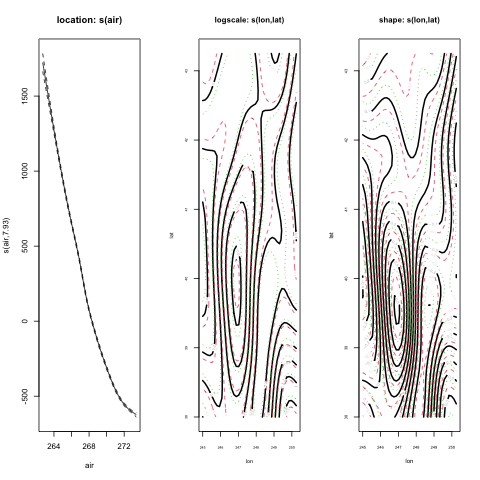

r_df summary
['Min.   :1980  ' '1st Qu.:1987  ' 'Median :1994  ' 'Mean   :1994  '
 '3rd Qu.:2001  ' 'Max.   :2008  ' 'Min.   :38.00  ' '1st Qu.:39.25  '
 'Median :40.62  ' 'Mean   :40.62  ' '3rd Qu.:42.00  ' 'Max.   :43.25  '
 'Min.   :250.0  ' '1st Qu.:251.2  ' 'Median :252.5  ' 'Mean   :252.5  '
 '3rd Qu.:253.8  ' 'Max.   :255.0  ' 'Min.   :   3.449  '
 '1st Qu.: 875.657  ' 'Median :1348.666  ' 'Mean   :1358.443  '
 '3rd Qu.:1812.489  ' 'Max.   :3472.118  ' 'Min.   :261.5  '
 '1st Qu.:264.9  ' 'Median :266.1  ' 'Mean   :266.4  ' '3rd Qu.:267.8  '
 'Max.   :273.4  ']


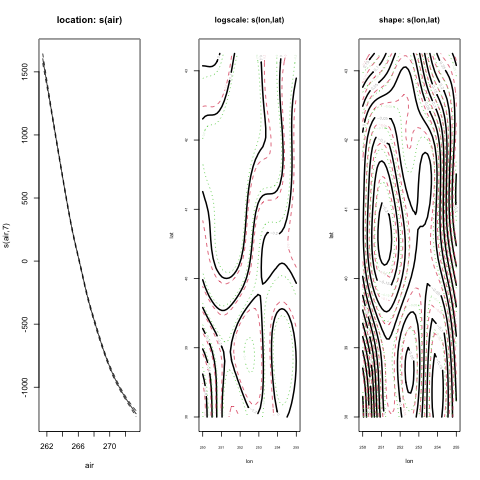

r_df summary
['Min.   :1980  ' '1st Qu.:1987  ' 'Median :1994  ' 'Mean   :1994  '
 '3rd Qu.:2001  ' 'Max.   :2008  ' 'Min.   :43.00  ' '1st Qu.:44.25  '
 'Median :45.50  ' 'Mean   :45.50  ' '3rd Qu.:46.75  ' 'Max.   :48.00  '
 'Min.   :245.0  ' '1st Qu.:246.2  ' 'Median :247.6  ' 'Mean   :247.6  '
 '3rd Qu.:249.0  ' 'Max.   :250.2  ' 'Min.   :  20.65  '
 '1st Qu.:1083.39  ' 'Median :1539.75  ' 'Mean   :1528.53  '
 '3rd Qu.:1964.71  ' 'Max.   :3779.14  ' 'Min.   :261.3  '
 '1st Qu.:264.4  ' 'Median :265.7  ' 'Mean   :265.9  ' '3rd Qu.:267.5  '
 'Max.   :271.1  ']


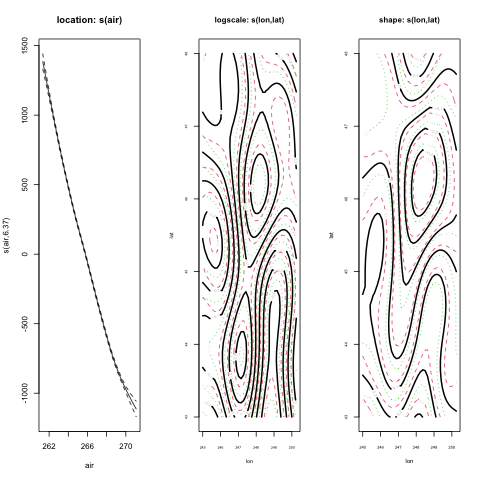

r_df summary
['Min.   :1980  ' '1st Qu.:1987  ' 'Median :1994  ' 'Mean   :1994  '
 '3rd Qu.:2001  ' 'Max.   :2008  ' 'Min.   :43.00  ' '1st Qu.:44.25  '
 'Median :45.50  ' 'Mean   :45.50  ' '3rd Qu.:46.75  ' 'Max.   :48.00  '
 'Min.   :250.0  ' '1st Qu.:251.2  ' 'Median :252.5  ' 'Mean   :252.5  '
 '3rd Qu.:253.8  ' 'Max.   :255.0  ' 'Min.   :   9.76  '
 '1st Qu.: 673.76  ' 'Median :1042.79  ' 'Mean   :1131.86  '
 '3rd Qu.:1457.16  ' 'Max.   :3784.19  ' 'Min.   :261.3  '
 '1st Qu.:266.7  ' 'Median :267.8  ' 'Mean   :267.4  ' '3rd Qu.:268.5  '
 'Max.   :270.3  ']


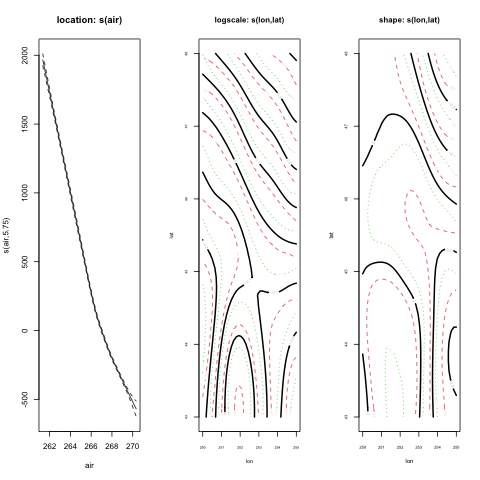

In [54]:
ib=[0,20,0,20]
jb=[0,0,20,20]
Rlocation=xr.zeros_like(dsm['air'])*np.nan
Rshape=xr.zeros_like(dsm['air'])*np.nan
Rscale=xr.zeros_like(dsm['air'])*np.nan
Rrl100=xr.zeros_like(dsm['air'])*np.nan
for ii in range(0,4):
  dsij=ds.isel(lon=slice(ib[ii],ib[ii]+22),lat=slice(jb[ii],jb[ii]+22)).load()
  dsmij=dsm.isel(lon=slice(ib[ii],ib[ii]+22),lat=slice(jb[ii],jb[ii]+22))
  df = dsij.to_dataframe()
  # Remove zeros if any (as in Bilotta et al.)
  df = df[df['AFI'] > 0.]
  df = df.reset_index()

  dfm=dsmij.to_dataframe()
  dfm=dfm.reset_index()
  # Convert pandas DataFrame to R data.frame
  r_df = ro.conversion.py2rpy(df)
  r_dfm=ro.conversion.py2rpy(dfm)

  # You can now work with 'r_df' in R
  print('r_df summary')
  print(ro.r['summary'](r_df))
  globalenv['r_df'] = r_df
  globalenv['r_dfm'] = r_dfm

  # model fitting  
  %R m_gev <- evgam(fmla_gev, r_df, family = "gev")
  %R plot(m_gev)
  %R gev_pred <- predict(m_gev, r_dfm, type = "response")
  %R gev_rl100 <- predict(m_gev, r_dfm, prob = 0.99)
  %R -o gev_pred,gev_rl100,r_dfm
  gev_pred['lon']=r_dfm['lon']
  gev_pred['lat']=r_dfm['lat']
  dsgev_pred=gev_pred.set_index(['lat','lon']).to_xarray()
  gev_rl100['lon']=r_dfm['lon']
  gev_rl100['lat']=r_dfm['lat']
  dsgev_rl100=gev_rl100.set_index(['lat','lon']).to_xarray()
  Rlon = dsgev_pred['lon'][1:21]
  Rlat = dsgev_pred['lat'][1:21]
  Rlocation.loc[{'lon':Rlon,'lat':Rlat}]=dsgev_pred['location'][1:21,1:21]
  Rscale.loc[{'lon':Rlon,'lat':Rlat}]=dsgev_pred['scale'][1:21,1:21]
  Rshape.loc[{'lon':Rlon,'lat':Rlat}]=dsgev_pred['shape'][1:21,1:21]
  Rrl100.loc[{'lon':Rlon,'lat':Rlat}]=dsgev_rl100['q:0.99'][1:21,1:21]

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/2413022019.py:24: SyntaxWarning: invalid escape sequence '\d'
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/2413022019.py:26: SyntaxWarning: invalid escape sequence '\d'
  ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=18)


[Text(0, 38.0, '38$\\degree$N'),
 Text(0, 40.0, '40$\\degree$N'),
 Text(0, 42.0, '42$\\degree$N'),
 Text(0, 44.0, '44$\\degree$N'),
 Text(0, 46.0, '46$\\degree$N'),
 Text(0, 48.0, '48$\\degree$N')]

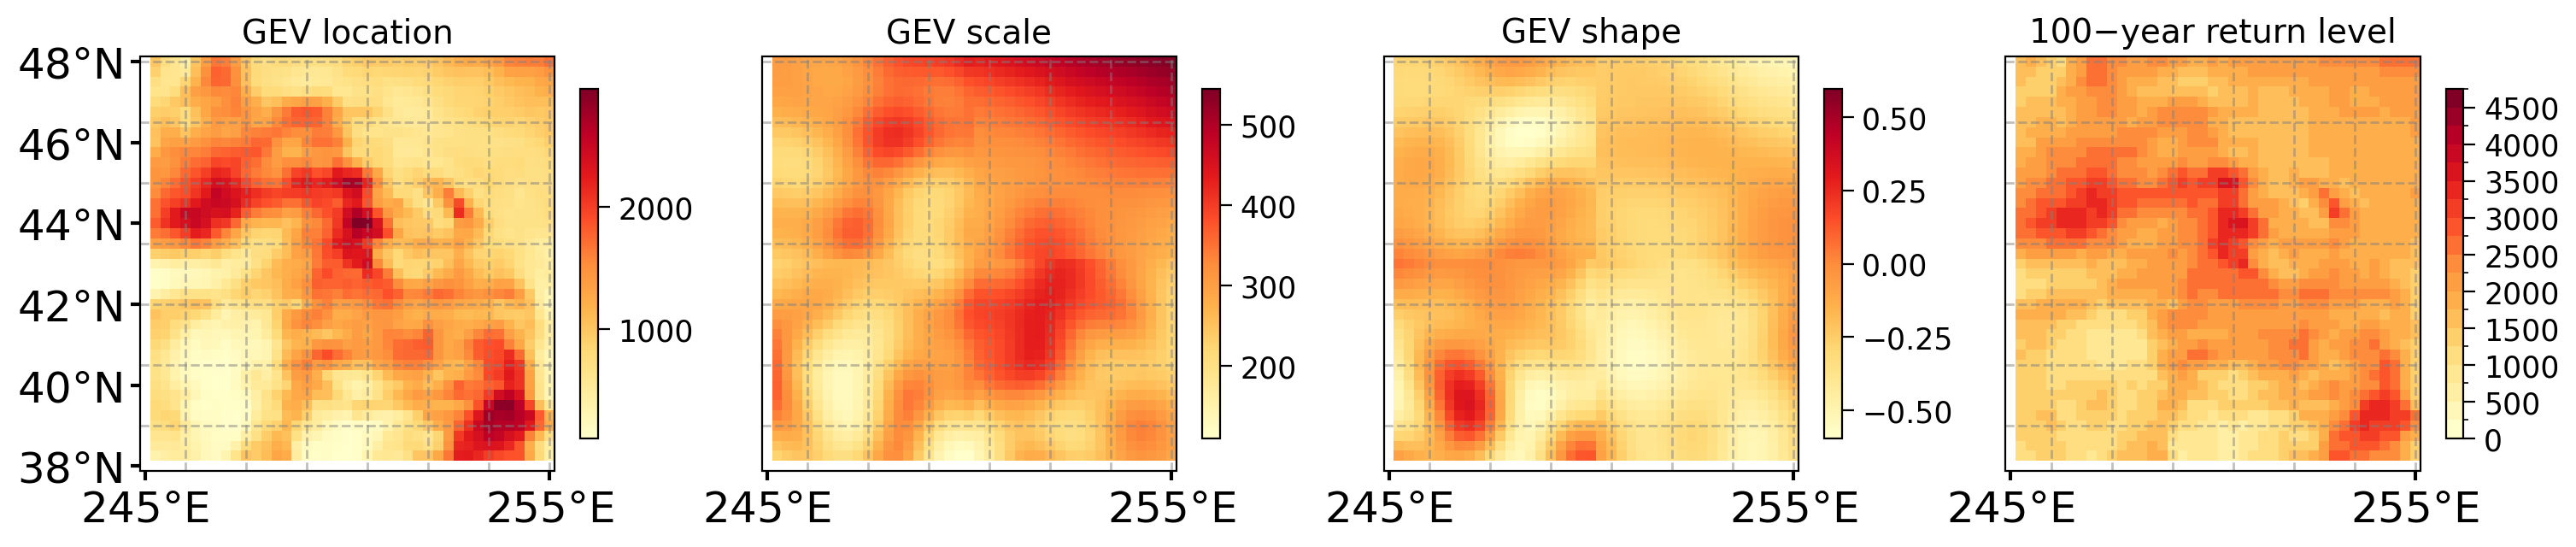

In [55]:

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(18,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.9,wspace=0.2)

Rlocation.plot(ax=ax[0],cmap='YlOrRd',cbar_kwargs={'label':'','shrink':0.35})
ax[0].set_title('GEV location',fontsize=14)

Rscale.plot(ax=ax[1],cmap='YlOrRd',cbar_kwargs={'label':'','shrink':0.35})
ax[1].set_title('GEV scale',fontsize=14)

Rshape.plot(ax=ax[2],cmap='YlOrRd',cbar_kwargs={'label':'','shrink':0.35})
ax[2].set_title('GEV shape',fontsize=14)

Rrl100.plot(ax=ax[3],cmap='YlOrRd',levels=np.arange(0,5000,250),cbar_kwargs={'label':'','shrink':0.35})
ax[3].set_title('100−year return level',fontsize=14)
for ix in range(0,len(ax)):
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].coastlines()
  #ax[ix].add_feature(state_borders,zorder=10,linewidth=0.25,edgecolor='k')
  gr=ax[ix].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--',draw_labels=False)
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)
ax[0].set_yticks(ax[0].get_yticks()[1:-1],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=18)

# Compute GEV parameters with scipy.stats.

In [47]:
return_period = [2, 5, 10, 25, 50, 100]
rp = return_period[-1]
Slocation = xr.zeros_like(dsm['air'])*np.nan
Sshape = xr.zeros_like(dsm['air'])*np.nan
Sscale = xr.zeros_like(dsm['air'])*np.nan
Srl100 = xr.zeros_like(dsm['air'])*np.nan
for j in range(0,len(ds['lat'])):
  for i in range(0,len(ds['lon'])):
     data = ds['AFI'].isel(lon=i,lat=j).load()
     afi_values = data.values
     # Remove zeros if any (as in Bilotta et al.)
     nonzero_afis = afi_values[afi_values > 0]
     if len(nonzero_afis)>15:
       shape, loc, scale = gev.fit(data.where(data>0), loc=nonzero_afis.mean(), scale=nonzero_afis.std(),method="MLE")
       Sshape[j,i] = shape
       Slocation[j,i] = loc
       Sscale[j,i] = scale
       p = 1 - 1/rp
       # Get the AFI value for this return period
       Srl100[j,i] = stats.genextreme.ppf(p, shape, loc, scale)

# Difference between the 2 methods. 

In [48]:
nbj = len(Srl100['lat'])
nbi = len(Srl100['lon'])

<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/3306429649.py:29: SyntaxWarning: invalid escape sequence '\d'
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)
/var/folders/2z/v4x6xdj96rg1k3xrmwt26xtc0000gp/T/ipykernel_5360/3306429649.py:31: SyntaxWarning: invalid escape sequence '\d'
  ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=18)


[Text(0, 38.0, '38$\\degree$N'),
 Text(0, 40.0, '40$\\degree$N'),
 Text(0, 42.0, '42$\\degree$N'),
 Text(0, 44.0, '44$\\degree$N'),
 Text(0, 46.0, '46$\\degree$N'),
 Text(0, 48.0, '48$\\degree$N')]

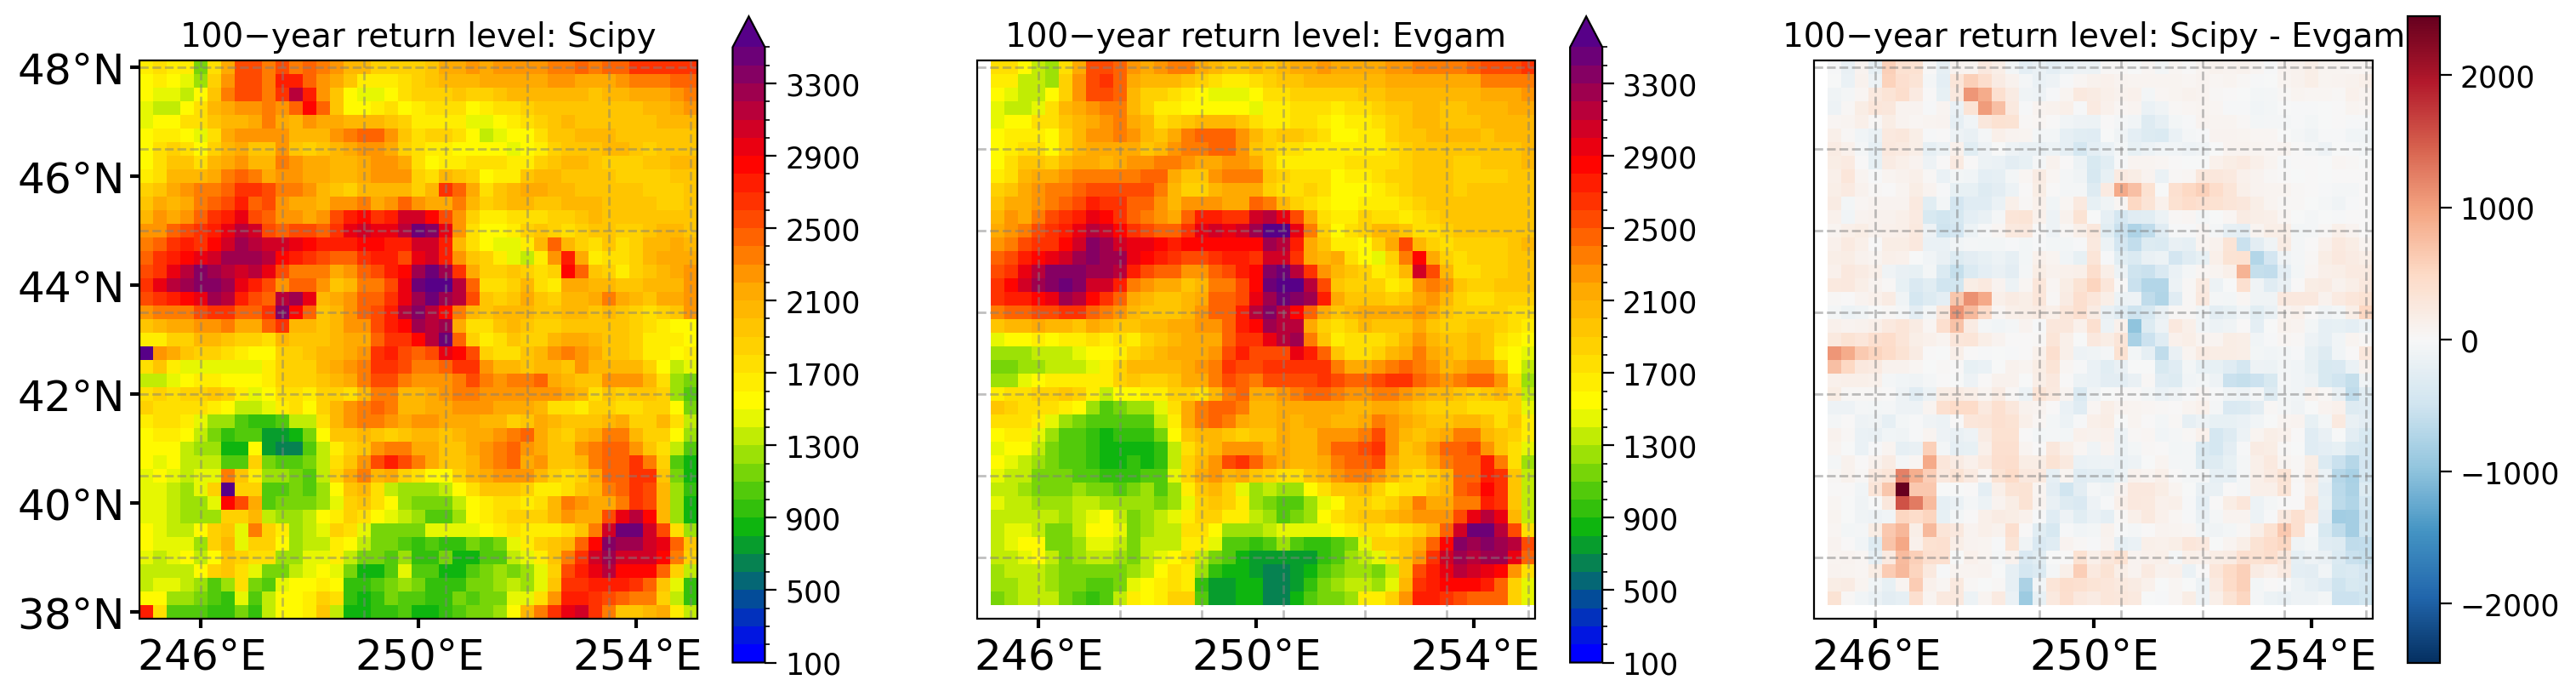

In [56]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.9,hspace=0.15)
#
data=Srl100
data=data#.isel(lon=slice(1,nbi-1))
data.plot(ax=ax[0],cmap=cmap,levels=np.arange(100,3600,100),cbar_kwargs={'label':'','shrink':0.65})
ax[0].set_title('100−year return level: Scipy',fontsize=14)
#
data=Rrl100
data=data#.isel(lon=slice(1,nbi-1))
data.plot(ax=ax[1],cmap=cmap,levels=np.arange(100,3600,100),cbar_kwargs={'label':'','shrink':0.65})
#ax[1].contour(dsij['lon'].isel(lon=slice(1,19)),dsij['lat'],dsij['AFI'].mean('time').isel(lon=slice(1,19)),color='k')
ax[1].set_title('100−year return level: Evgam',fontsize=14)
#
data=(Srl100-Rrl100)
data=data#.isel(lon=slice(1,nbi-1))
data.plot(ax=ax[2],cbar_kwargs={'label':'','shrink':0.65})
#ax[2].contour(data['lon'],data['lat'],dsmij['air'].isel(lon=slice(1,19)),cmap='terrain')
ax[2].set_title('100−year return level: Scipy - Evgam',fontsize=14)
for ix in range(0,len(ax)):
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].coastlines()
  #ax[ix].add_feature(state_borders,zorder=10,linewidth=0.25,edgecolor='k')
  gr=ax[ix].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--',draw_labels=False)
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx+360)}$\degree$E' for ixx in ax[ix].get_xticks()],size=18)
ax[0].set_yticks(ax[0].get_yticks()[1:-1],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=18)

The 100-year return level is expressed in degree-days (F).